In [37]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image
from proj2_helpers import *
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [38]:
# Loaded a set of images
num_traset = 100 #Trainingset numbers
root_dir = "Datasets/training"

image_dir = root_dir + "/images/"
files = os.listdir(image_dir)
n = min(num_traset,len(files)) 
print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]
print(files[0])
gt_dir = root_dir + "/groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]
print(files[0])

Loading 100 images
satImage_001.png
Loading 100 images
satImage_001.png


In [43]:
# Extract patches from input images
patch_size = 16 # each patch is 16*16 pixels

img_patches = [img_crop(imgs[i], patch_size, patch_size) for i in range(n)]
gt_patches = [img_crop(gt_imgs[i], patch_size, patch_size) for i in range(n)]

In [50]:
img_patches[1][2].shape

(16, 16, 3)

In [40]:
# Linearize list of patches
img_patches = np.asarray([img_patches[i][j] for i in range(len(img_patches)) for j in range(len(img_patches[i]))])
gt_patches =  np.asarray([gt_patches[i][j] for i in range(len(gt_patches)) for j in range(len(gt_patches[i]))])

In [42]:
img_patches.shape

(62500, 16, 16, 3)

In [22]:
# Compute features for each image patch
X_tra = np.asarray([extract_features(img_patches[i]) for i in range(len(img_patches))])
Y_tra = np.asarray([value_to_class(np.mean(gt_patches[i])) for i in range(len(gt_patches))])

In [23]:
# Print feature statistics

print('Computed ' + str(X_tra.shape[0]) + ' features')
print('Feature dimension = ' + str(X_tra.shape[1]))
print('Number of classes = ' + str(np.max(Y_tra)))  #TODO: fix, length(unique(Y)) 

Y0 = [i for i, j in enumerate(Y_tra) if j == 0]
Y1 = [i for i, j in enumerate(Y_tra) if j == 1]
print('Class 0: ' + str(100*len(Y0)/len(Y_tra)) + ' %',str(len(Y0))+'samples')
print('Class 1: ' + str(100*len(Y1)/len(Y_tra)) + ' %',str(len(Y1))+'samples')

Computed 62500 features
Feature dimension = 6
Number of classes = 1
Class 0: 74.0944 % 46309samples
Class 1: 25.9056 % 16191samples


In [24]:
def poly_fit(X):
    """
    Fit the dataset using a polynomial basis.
    """
    poly = PolynomialFeatures(4, interaction_only=False)
    return poly.fit_transform(X)

In [25]:
logreg = linear_model.LogisticRegression(C=1e5)
X_tra_poly = poly_fit(X_tra)
logreg.fit(X_tra_poly, Y_tra)

C:\Users\wangz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
X_tra_poly.shape

(62500, 210)

In [27]:
def get_prediction_logreg(img,patch_size):
    IMG_PATCH_SIZE = patch_size
    data = np.asarray(img_crop(img, IMG_PATCH_SIZE, IMG_PATCH_SIZE))
    X = np.asarray([extract_features(data[i]) for i in range(len(data))])
    X_poly = poly_fit(X)
    output_prediction = logreg.predict(X_poly)
    img_prediction = label_to_img(img.shape[0], img.shape[1], IMG_PATCH_SIZE, IMG_PATCH_SIZE, output_prediction)

    return img_prediction

In [28]:
# Get prediction
TEST_SIZE = 50
test_data_filename = 'Datasets/test_set_images/'
print("Running prediction on test set")
prediction_test_dir = "predictions_test_2/"
if not os.path.isdir(prediction_test_dir):
    os.mkdir(prediction_test_dir)
for i in range(1, TEST_SIZE + 1):
    test = "test_%d" % i
    image_filename = test_data_filename + test + '/' + test +  ".png"
    img = mpimg.imread(image_filename)
    pimg = get_prediction_logreg(img,patch_size)
    pimg8 = img_float_to_uint8(pimg)
    pimg8_L = Image.fromarray(pimg8, 'L')
    pimg8_L.save(prediction_test_dir + "prediction_" + str(i) + ".png")

Running prediction on test set


C:\Course\2019Fall\ML\ML_project2\Project_Self\proj2_helpers.py:16: RuntimeWarning: invalid value encountered in true_divide
  rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
C:\Course\2019Fall\ML\ML_project2\Project_Self\proj2_helpers.py:16: RuntimeWarning: invalid value encountered in true_divide
  rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
C:\Course\2019Fall\ML\ML_project2\Project_Self\proj2_helpers.py:16: RuntimeWarning: invalid value encountered in true_divide
  rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
C:\Course\2019Fall\ML\ML_project2\Project_Self\proj2_helpers.py:16: RuntimeWarning: invalid value encountered in true_divide
  rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
C:\Course\2019Fall\ML\ML_project2\Project_Self\proj2_helpers.py:16: RuntimeWarning: invalid value encountered in true_divide
  rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
C:\Course\2019Fall\ML\ML_project2\Project_Self\proj2_helpers.py:1

In [29]:
pimg = get_prediction_logreg(img,patch_size)

In [30]:
pimg

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
pimg8 = img_float_to_uint8(pimg)
pimg8_L = Image.fromarray(pimg8, 'L')

C:\Course\2019Fall\ML\ML_project2\Project_Self\proj2_helpers.py:16: RuntimeWarning: invalid value encountered in true_divide
  rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)


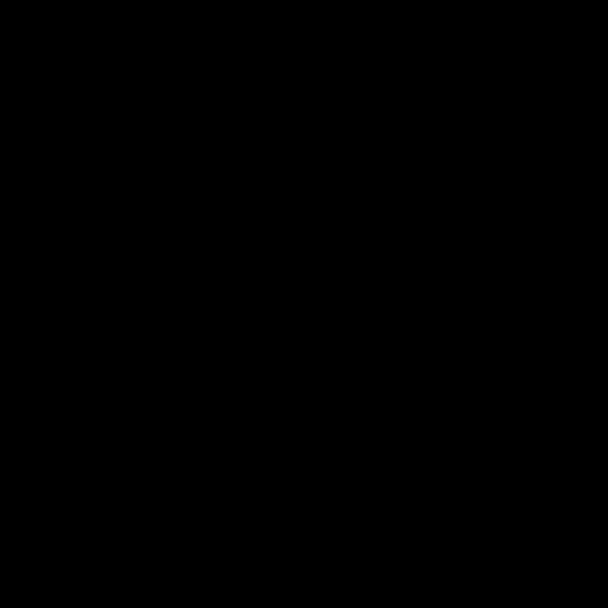

In [32]:
pimg8_L

In [ ]:
w = gt_imgs[img_idx].shape[0]
h = gt_imgs[img_idx].shape[1]
predicted_im = label_to_img(w, h, patch_size, patch_size, Zi)

In [ ]:
608